<a href="https://colab.research.google.com/github/j764012/titanic-analyzsis/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<ipython-input-138-266930d2ed76>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


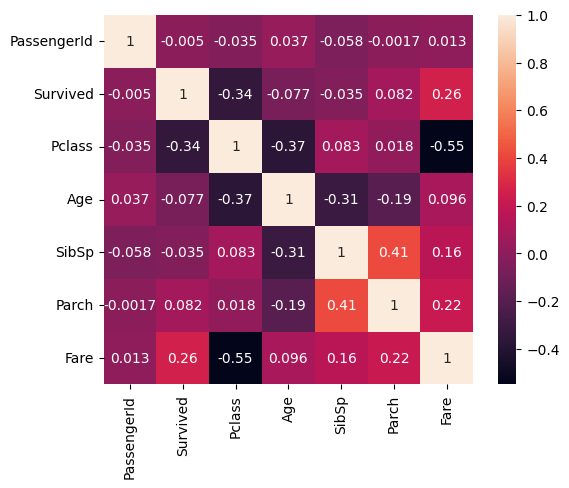

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train.corr()

cmap = sns.heatmap(corr, square=True, annot=True)

# preprocessing

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
df_train['Age'].mean()

29.69911764705882

In [142]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

df_train['Embarked'] = df_train['Embarked'].fillna('None')

In [143]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [144]:
df_train['Embarked'].value_counts()

S       644
C       168
Q        77
None      2
Name: Embarked, dtype: int64

In [145]:
from keras.utils.np_utils import to_categorical
label_map = {
    'female' : 0,
    'male' : 1,
    'S' : 0 ,
    'C'  : 1,
    'Q'  : 2,
    'None':4
}

df_train['Sex'] = df_train['Sex'].map( lambda x : label_map[x])
df_train['Embarked'] = df_train['Embarked'].map( lambda x : label_map[x])
from keras.utils import  to_categorical
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False)

onehot_column = onehot.fit_transform(df_train[['Embarked']])
onehot_column = pd.DataFrame(onehot_column, columns=['S', 'C', 'Q', "None"], index=df_train.index)


In [146]:
df_train = df_train.join(onehot_column)

# feature preprocssing

In [147]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q,None
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1.0,0.0,0.0,0.0


In [148]:
df_train['Name'].loc[0].split( ',' )[1].split( '.' )[0].strip()

'Mr'

In [149]:
df_train['Title Row'] = df_train['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

title_encoding = {
  "Capt":      "Officer",
  "Col":        "Officer",
  "Major":      "Officer",
  "Jonkheer":   "Royalty",
  "Don":        "Royalty",
  "Sir" :       "Royalty",
  "Dr":         "Officer",
  "Rev":        "Officer",
  "the Countess":"Royalty",
  "Dona":       "Royalty",
  "Mme":        "Mrs",
  "Mlle":       "Miss",
  "Ms":         "Mrs",
  "Mr" :        "Mr",
  "Mrs" :       "Mrs",
  "Miss" :      "Miss",
  "Master" :    "Master",
  "Lady" :      "Royalty"
}

df_train['Title'] = df_train['Title Row'].map(title_encoding)



In [150]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q,None,Title Row,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0,0.0,0.0,0.0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0.0,1.0,0.0,0.0,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0,0.0,0.0,0.0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1.0,0.0,0.0,0.0,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1.0,0.0,0.0,0.0,Mr,Mr


In [151]:
df_Title_ohehot = pd.get_dummies(df_train['Title'], prefix='Title_')
df_train = df_train.join(df_Title_ohehot)

In [152]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'S', 'C', 'Q', 'None',
       'Title Row', 'Title', 'Title__Master', 'Title__Miss', 'Title__Mr',
       'Title__Mrs', 'Title__Officer', 'Title__Royalty'],
      dtype='object')

# evaluate model

In [153]:
columns_X = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q', "None"]
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression(random_state=42, max_iter=3000)

score = cross_val_score(lin_reg, train_X, train_y.values.ravel(), cv=5)
print(score.mean())

0.789008850668508


In [154]:
columns_X = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q', "None", 'Title__Master', 'Title__Miss', 'Title__Mr',
       'Title__Mrs', 'Title__Officer', 'Title__Royalty']
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression(random_state=42, max_iter=3000)

score = cross_val_score(lin_reg, train_X, train_y.values.ravel(), cv=5)
print(score.mean())

0.8260247316552632


# compare with different algorithm

In [155]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


rf_clf = RandomForestClassifier()
score = cross_val_score(rf_clf, train_X, train_y, scoring='accuracy', cv=5).mean()

svm_clf = SVC(random_state=42)
score2 = cross_val_score(rf_clf, train_X, train_y, scoring='accuracy', cv=5).mean()

dtree_clf = DecisionTreeClassifier()
score3 = cross_val_score(rf_clf, train_X, train_y, scoring='accuracy', cv=5).mean()

KNN_clf = KNeighborsClassifier(n_neighbors=3)
score4 = cross_val_score(rf_clf, train_X, train_y, scoring='accuracy', cv=5).mean()

nb_clf = GaussianNB()
score5 = cross_val_score(rf_clf, train_X, train_y, scoring='accuracy', cv=5).mean()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [156]:
accuracy = {
    'RandomForestClassifier' : score,
    'SVC':score2,
    'DecisionTreeClassifier':score3,
    'KNeighborsClassifier' : score4,
    'GaussianNB': score5
}
accuracy = {
    'model':['RandomForestClassifier','SVC','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB'],
    'score' : [score, score2, score3, score4, score5]

}
accuracy_df = pd.DataFrame(accuracy)
accuracy_df

,model,score
0,RandomForestClassifier,0.809215
1,SVC,0.808091
2,DecisionTreeClassifier,0.812586
3,KNeighborsClassifier,0.802498
4,GaussianNB,0.804739


In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale']
}
svm = SVC(random_state=42)

gridsearch = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')
gridsearch.fit(train_X, train_y)
best_params = gridsearch.best_params_
print('best params', best_params)
print('best score', gridsearch.best_score_)

svm = SVC(**best_params)
svm.fit(train_X, train_y)
score = cross_val_score(svm, train_X, train_y, cv=5, scoring='accuracy')
print('score : ', score.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

best params {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
best score 0.8237775406440274


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

score :  0.8237775406440274


# pytorch

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2)

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# train data
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Age'].interpolate(method='linear', axis=0, limit=None, inplace=True)
df.dropna(inplace=True)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


# val_data
val_df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')
val_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

val_df.interpolate(method='linear', axis=0, limit=None, inplace=True)
val_df['Sex'] = label_encoder.fit_transform(val_df['Sex'])
val_df['Embarked'] = label_encoder.fit_transform(val_df['Embarked'])
val_X = val_df.drop('PassengerId', axis=1)
# test_y = test_df['Survived']

In [160]:
from sklearn.model_selection import train_test_split

features = df.drop('Survived', axis=1)
labels = df['Survived']


train_X, test_X, train_y, test_y= train_test_split(features, labels, test_size=0.2)

train_X = train_X.drop('PassengerId', axis=1)
test_X = test_X.drop('PassengerId', axis=1)

In [161]:
train_X.shape

(711, 7)

In [162]:
test_X.shape

(178, 7)

In [163]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 16)
(712, 1)
(179, 16)
(179, 1)


## onehot

In [164]:
import tensorflow as tf

y_train_onehot = tf.keras.utils.to_categorical(train_y, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(test_y)

In [165]:
y_test_onehot.shape

(178, 2)

## model and training

In [166]:
import torch
if torch.cuda.is_available():
  device = torch.device("cuda")
  print(device)
else:
  device = torch.device('cpu')
  print(device)

cpu


In [167]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Linear(nn.Module):
  def __init__(self):
    super(Linear, self).__init__()
    self.fc1 = nn.Linear(7, 100)
    self.fc2 = nn.Linear(100, 200)
    self.fc3 = nn.Linear(200, 2)

  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.relu(x)
    return x

model = Linear()
model.to(device)

Linear(
  (fc1): Linear(in_features=7, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=2, bias=True)
)

In [168]:
train_X.shape

(711, 7)

In [169]:
train_X_tensor = torch.tensor(train_X.values, dtype=torch.float32).to(device)
train_y_tensor = torch.tensor(y_train_onehot, dtype=torch.float32).to(device)
test_X_tensor = torch.tensor(test_X.values, dtype=torch.float32).to(device)
test_y_tensor = torch.tensor(y_test_onehot, dtype=torch.float32).to(device)

In [170]:
import torch

# 創建一個張量
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# 計算張量中的最大值
max_value = torch.max(x)

# 指定維度計算每個維度上的最大值
max_value_dim0, _ = torch.max(x, dim=0)
max_value_dim1, _ = torch.max(x, dim=1)

# 顯示計算結果
print(max_value)
print(max_value_dim0)
print(max_value_dim1)

tensor(6)
tensor([4, 5, 6])
tensor([3, 6])


In [171]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.0)
loss_his = []
test_loss_his = []
batch_size = 16
batch_num = len(X_train) // batch_size
epochs = 1000

for epoch in range(epochs):
  for i in range(batch_num):
    start = i*batch_size
    end = start + batch_size

    X_tensor = train_X_tensor[start:end].to(device)
    y_tensor = train_y_tensor[start:end].to(device)
    optimizer.zero_grad()


    loss = loss_fn(model(X_tensor), y_tensor)
    loss.backward()
    optimizer.step()


  if epoch % 5 == 0:
    print(f'epoch : {epoch}, loss : {loss}')
  loss = loss_fn(model(train_X_tensor), train_y_tensor)
  loss_his.append(loss.item())
  loss = loss_fn(model(test_X_tensor), test_y_tensor)
  test_loss_his.append(loss.item())

epoch : 0, loss : 0.662912905216217
epoch : 5, loss : 0.6695191860198975
epoch : 10, loss : 0.6776933073997498
epoch : 15, loss : 0.685452938079834
epoch : 20, loss : 0.6923615336418152
epoch : 25, loss : 0.6988983750343323
epoch : 30, loss : 0.7045779228210449
epoch : 35, loss : 0.709740161895752
epoch : 40, loss : 0.714172899723053
epoch : 45, loss : 0.716486930847168
epoch : 50, loss : 0.7175514101982117
epoch : 55, loss : 0.7055694460868835
epoch : 60, loss : 0.6998618245124817
epoch : 65, loss : 0.6929283142089844
epoch : 70, loss : 0.6300172805786133
epoch : 75, loss : 0.6102117300033569
epoch : 80, loss : 0.6080614328384399
epoch : 85, loss : 0.6065653562545776
epoch : 90, loss : 0.6072710752487183
epoch : 95, loss : 0.6087480187416077
epoch : 100, loss : 0.6070606708526611
epoch : 105, loss : 0.6050474047660828
epoch : 110, loss : 0.6065452098846436
epoch : 115, loss : 0.6069684028625488
epoch : 120, loss : 0.6065464019775391
epoch : 125, loss : 0.6038278937339783
epoch : 130, 

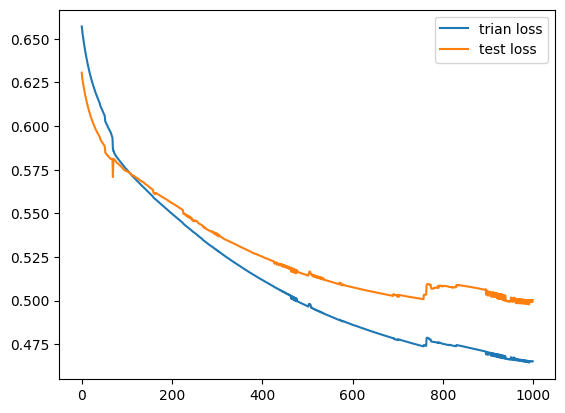

In [172]:
import matplotlib.pyplot as plt

plt.plot(loss_his, label='trian loss')
plt.plot(test_loss_his, label='test loss')
plt.legend()
plt.show()

In [175]:
from sklearn.metrics import accuracy_score
preds = model(test_X_tensor)
# preds = torch.max(preds, 1)[1]
preds = torch.max(preds.data, 1)[1]
target = torch.max(test_y_tensor, 1)[1]
correct = torch.sum(preds == target)
accuracy = 100 * correct / float(len(test_y_tensor))
print(accuracy)
# test_y_tensor = test_y_tensor.detach()
# test_y_tensor = test_y_tensor.cpu()
# score = accuracy_score(test_y_tensor.values, preds)


tensor(74.1573)


In [174]:
target

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0])